In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [14]:
df = pd.read_csv(r"C:\Users\Neeraj Nair R\Downloads\UCI_Credit_Card.csv\UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df['default.payment.next.month'].value_counts(normalize=True)

default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

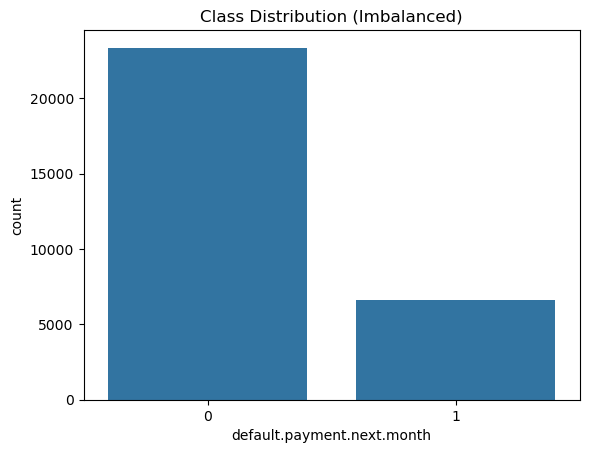

In [16]:
sns.countplot(x='default.payment.next.month', data=df)
plt.title("Class Distribution (Imbalanced)")
plt.show()

In [17]:
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
import warnings
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7935
Precision: 0.553012048192771
Recall: 0.3458929917106255


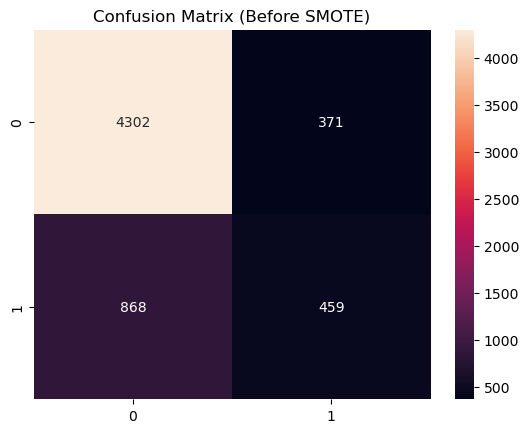

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix (Before SMOTE)")
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [25]:
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = knn_smote.predict(X_test_scaled)

In [26]:
print("Accuracy (SMOTE):", accuracy_score(y_test, y_pred_smote))
print("Precision (SMOTE):", precision_score(y_test, y_pred_smote))
print("Recall (SMOTE):", recall_score(y_test, y_pred_smote))

Accuracy (SMOTE): 0.6556666666666666
Precision (SMOTE): 0.3433658329800763
Recall (SMOTE): 0.6103993971363979


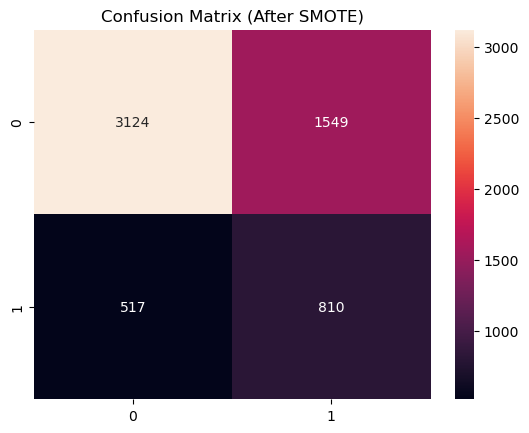

In [27]:
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d')
plt.title("Confusion Matrix (After SMOTE)")
plt.show()

In [28]:
summary = pd.DataFrame({
    'Scenario': ['Before SMOTE', 'After SMOTE'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_smote)
    ],
    'Precision': [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_smote)
    ],
    'Recall': [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_smote)
    ]
})

summary

,Scenario,Accuracy,Precision,Recall
0,Before SMOTE,0.793500,0.553012,0.345893
1,After SMOTE,0.655667,0.343366,0.610399
